# Pymaceuticals Inc.
---

### Analysis

- Looking at the statistics the data throws we can observe that the drugs that were used the most were Capumoline / Ramicane.
- Also the population of mice is fairly even between male and female, male mice population is slightly larger by 0.7 percent.
- Results show that both Ramicane and Capomuline have a significantly lower volumes compared to other drugs and placebo.
- A sample of a Mouse show a decrease in tumor volume over time, meaning that the treatment for this particular mouse had a good outcome.
- There is also a strong correlation of Mouse Weigh and Tumor Volume, this means lighter mouse have smaller tumors, heavier mouse have larger tumors.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pym_data_com = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
pym_data_com.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = pym_data_com["Mouse ID"].count()
print(total_mice)

1893


In [3]:
# Type & Number of Data Fields Available
pym_data_com.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# List of Mice and Duplicates
pym_data_com['Mouse ID'].value_counts() 

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [5]:
# Data Types Available
pym_data_com.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mouse = pym_data_com.duplicated(subset=['Mouse ID', 'Timepoint'])
pym_data_com_no_dupes = pym_data_com.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pym_data_com_no_dupes = pym_data_com_no_dupes[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites']]

print("\nDataFrame with rearranged columns:")
print(pym_data_com_no_dupes)


DataFrame with rearranged columns:
     Mouse ID  Timepoint Drug Regimen   Sex  Age_months  Weight (g)  \
0        k403          0     Ramicane  Male          21          16   
1        k403          5     Ramicane  Male          21          16   
2        k403         10     Ramicane  Male          21          16   
3        k403         15     Ramicane  Male          21          16   
4        k403         20     Ramicane  Male          21          16   
...       ...        ...          ...   ...         ...         ...   
1888     z969         25     Naftisol  Male           9          30   
1889     z969         30     Naftisol  Male           9          30   
1890     z969         35     Naftisol  Male           9          30   
1891     z969         40     Naftisol  Male           9          30   
1892     z969         45     Naftisol  Male           9          30   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
pym_data_com.loc[duplicated_mouse]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#pym_data_com_no_mice_dupes = pym_data_com_no_dupes.drop_duplicates(subset=['Mouse ID'])

pym_data_com_no_mice_dupes = pym_data_com.loc[pym_data_com['Mouse ID']!="g989"]

print(pym_data_com_no_mice_dupes)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [9]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean_data = pym_data_com_no_mice_dupes["Mouse ID"].count()

#print(total_mice_clean_data)
print(total_mice_clean_data)

1880


## Summary Statistics

In [10]:
tot_mice_clean_data_series = pd.Series(total_mice_clean_data)
tot_mice_clean_data_series.describe()

count       1.0
mean     1880.0
std         NaN
min      1880.0
25%      1880.0
50%      1880.0
75%      1880.0
max      1880.0
dtype: float64

In [11]:
# Types of Drug Regimens
drug_regimens = pym_data_com['Drug Regimen'].unique()
print(drug_regimens)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [12]:
# Mean Tumor Volume By Drug Regimen

mean_tumor_vol = pym_data_com_no_dupes.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
print(mean_tumor_vol)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


In [13]:
# Median Tumor Volume By Drug Regimen

median_tumor_vol = pym_data_com_no_dupes.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
print(median_tumor_vol)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [14]:
# Variance Tumor Volume By Drug Regimen

var_tumor_vol = pym_data_com_no_dupes.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
print(var_tumor_vol) 

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64


In [15]:
# Standard Deviation Tumor Volume By Drug Regimen

std_dev_tumor_vol = pym_data_com_no_dupes.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
print(std_dev_tumor_vol)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [16]:
# Standard Error Tumor Volume By Drug Regimen

std_error_tumor_vol = pym_data_com_no_dupes.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
print(std_error_tumor_vol)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume":  mean_tumor_vol,
    "Median Tumor Volume":  median_tumor_vol,
    "Tumor Volume Variance":  var_tumor_vol,
    "Tumor Volume Std. Dev.":  std_dev_tumor_vol,
    "Tumor Volume Std. Err.":  std_error_tumor_vol,
})

drug_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = pd.pivot_table(pym_data_com_no_dupes, values='Tumor Volume (mm3)', index='Drug Regimen', aggfunc=['mean', 'median', 'var', 'std'])
summary_stats['SEM'] = summary_stats[('std', 'Tumor Volume (mm3)')] / (pym_data_com_no_dupes.groupby('Drug Regimen')['Tumor Volume (mm3)'].count() ** 0.5)
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

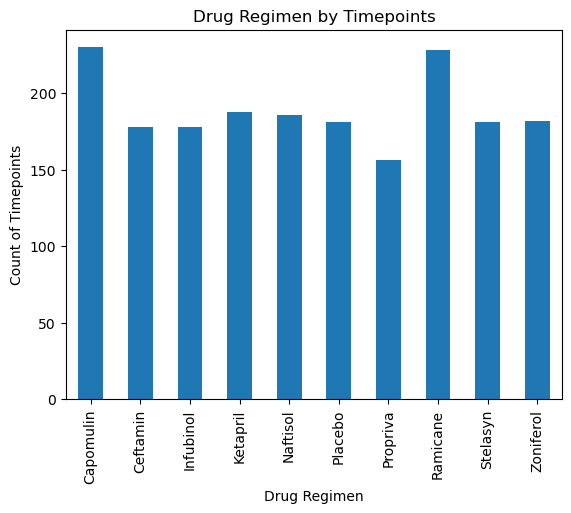

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot_drug_time_pd = pym_data_com_no_dupes.groupby('Drug Regimen')['Timepoint'].count()
bar_plot_drug_time_pd.plot(x='Drug Regimen', y='Timepoint', kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Count of Timepoints')
plt.title('Drug Regimen by Timepoints')

plt.show()

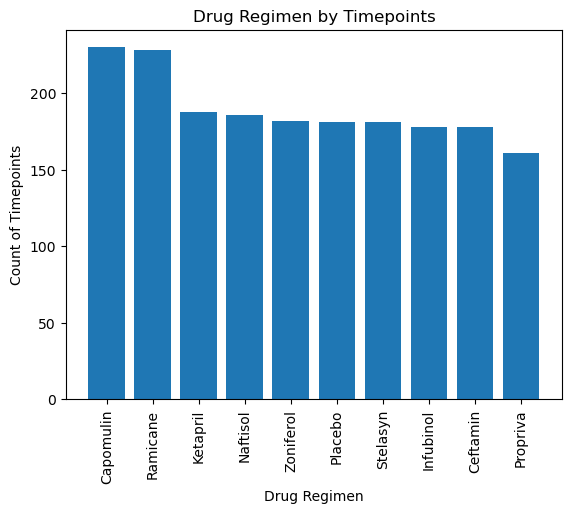

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoint_counts = pym_data_com['Drug Regimen'].value_counts()
drug_regimens = timepoint_counts.index
plt.bar(drug_regimens, timepoint_counts)

plt.xlabel('Drug Regimen')
plt.ylabel('Count of Timepoints')
plt.title('Drug Regimen by Timepoints')
plt.xticks(rotation=90)

plt.show()

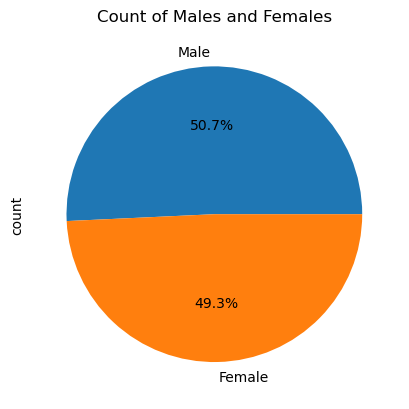

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

count_gender = pym_data_com_no_dupes.Sex.value_counts()
count_gender.plot(kind="pie",autopct='%1.1f%%')
plt.title('Count of Males and Females')
plt.show()

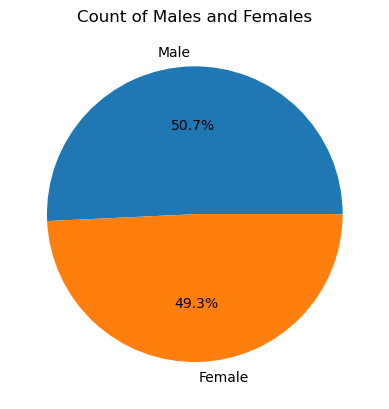

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot

count_gender = pym_data_com_no_dupes.Sex.value_counts()
gender_labels = count_gender.index.tolist()
plt.pie(count_gender, labels=gender_labels, autopct='%1.1f%%')
plt.title('Count of Males and Females')
plt.show()

In [23]:
boxplot_data = pym_data_com_no_mice_dupes.groupby('Mouse ID')['Timepoint'].max()
print(boxplot_data)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


In [24]:
df_to_merge = boxplot_data.reset_index()
boxplot_merged_df = pd.merge(df_to_merge, pym_data_com_no_mice_dupes,how='left', on=['Mouse ID','Timepoint'])
print(boxplot_merged_df)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

boxplot_data = pym_data_com_no_mice_dupes.groupby('Mouse ID')['Timepoint'].max()
print(boxplot_data)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

df_to_merge = boxplot_data.reset_index()
boxplot_merged_df = pd.merge(df_to_merge, pym_data_com_no_mice_dupes,how='left', on=['Mouse ID','Timepoint'])
print(boxplot_merged_df)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64
    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftiso

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = boxplot_merged_df.loc[boxplot_merged_df['Drug Regimen']==i,"Tumor Volume (mm3)"]
        
    # add subset 
    tumor_vol_data.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_data.loc[(tumor_data<lower_bound)|(tumor_data>upper_bound)]
    print(f"Drug Name = {i}; outliers={outliers}")

Drug Name = Capomulin; outliers=Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Name = Ramicane; outliers=Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Name = Infubinol; outliers=31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Name = Ceftamin; outliers=Series([], Name: Tumor Volume (mm3), dtype: float64)


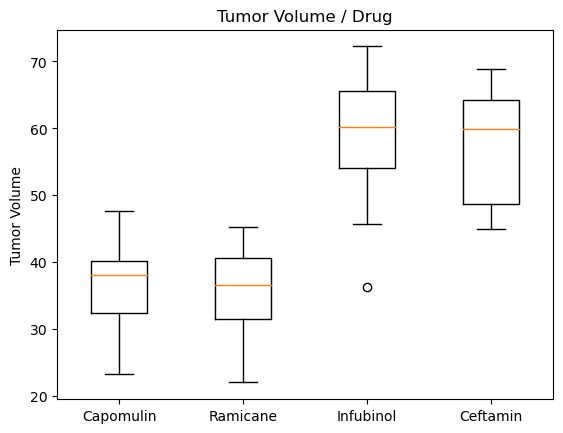

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# tumor_vol_data

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)

ax1.set_title('Tumor Volume / Drug')
ax1.set_ylabel('Tumor Volume')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

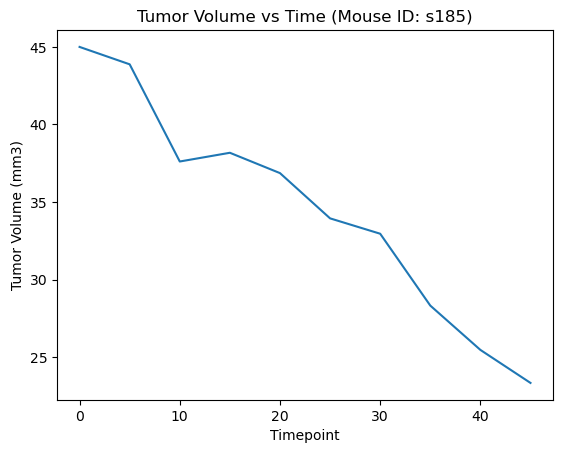

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mice_data = pym_data_com_no_mice_dupes[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
single_mouse_data = mice_data[mice_data["Mouse ID"] == "s185"]

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time (Mouse ID: s185)')


#print(single_mouse_data)
plt.show()

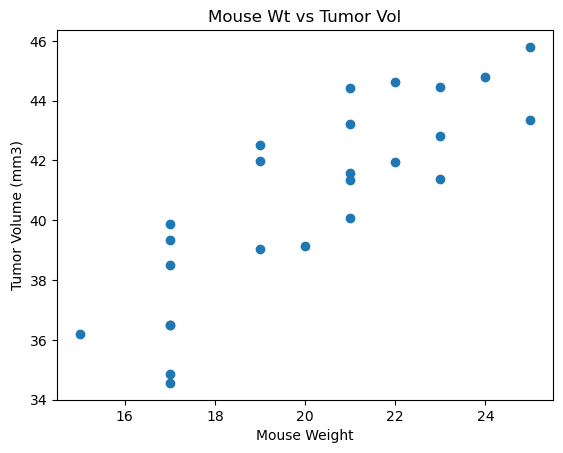

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

single_drug_data = pym_data_com_no_mice_dupes[pym_data_com_no_mice_dupes["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = single_drug_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

#plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Wt vs Tumor Vol')
plt.show() 

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

avg_tumor_vol = single_drug_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
print(correlation)

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712393e-07)
